### Segment Geospatial (samgeo)

[https://samgeo.gishub.org](https://samgeo.gishub.org)

[https://samgeo.gishub.org/samgeo/](https://samgeo.gishub.org/samgeo/)

[https://samgeo.gishub.org/examples/text_prompts/](https://samgeo.gishub.org/examples/text_prompts/)

In [1]:
#conda install pytorch torchvision -c pytorch
#pip install segment-geospatial groundingdino-py leafmap localtileserver
#conda install gdal


In [2]:
from samgeo.text_sam import LangSAM

In [9]:
# imagem local

image = "../1_estudo_segmentar_cores/DJI_0128.tif"

In [6]:
sam = LangSAM(model_type='vit_l')

final text_encoder_type: bert-base-uncased


**box_threshold:** Este valor é usado para detecção de objetos na imagem. Um valor mais alto torna o modelo mais seletivo, identificando apenas as instâncias de objetos com maior confiança, resultando em menos detecções no geral. Um valor mais baixo, por outro lado, torna o modelo mais tolerante, levando a um aumento nas detecções, incluindo possivelmente aquelas com menor confiança.

**text_threshold:** Este valor é usado para associar os objetos detectados com o texto fornecido. Um valor mais alto exige uma associação mais forte entre o objeto e o texto, levando a associações mais precisas, mas potencialmente menos. Um valor mais baixo permite associações mais frouxas, o que pode aumentar o número de associações, mas também introduzir correspondências menos precisas.

In [14]:
text_prompt = "human"

In [15]:
mascaras = sam.predict(image, text_prompt, box_threshold=0.15, text_threshold=0.15)

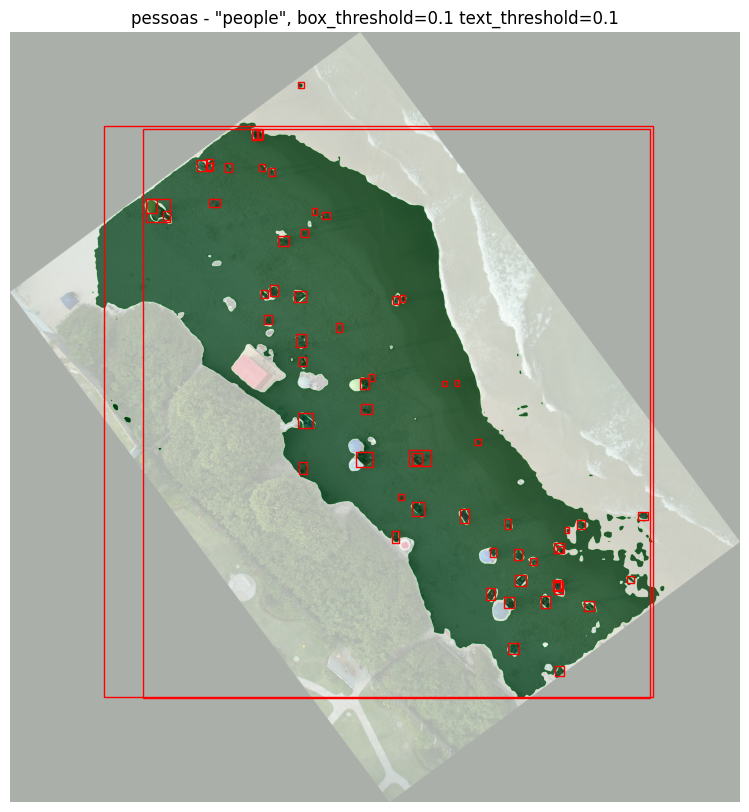

In [16]:
sam.show_anns(
    cmap='Greens',
    box_color='red',
    title='pessoas - "people", box_threshold=0.1 text_threshold=0.1',
    alpha=0.7,
    #blend=True,
)